# 1. Binary Classification Example

In [1]:
import mikegrad as mg

In [2]:
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]

ys = [1.0, 0.0, 0.0, 1.0]

xs = mg.from_list(xs)
ys = mg.from_list(ys)

In [3]:
from mikegrad.nn import MLP
mlp = MLP(nin=3, 
          nouts=[4, 4, 1],
          act= mg.nn.ReLU(),
          out_act= mg.nn.Sigmoid()
          )
mlp

In [4]:
from mikegrad.utils import train
from mikegrad.losses import BCELoss
from mikegrad.optim import Adam

loss_fn = BCELoss()
lr=0.1
optimizer = Adam(mlp.parameters(), lr=lr)
nepochs=1000
train(mlp, xs, ys, loss_fn, optimizer, nepochs)

Epochs: 100%|██████████| 1000/1000 [00:03<00:00, 257.77it/s, loss=0.000000]


In [5]:
from mikegrad.utils import test

loss, y_preds = test(mlp, xs, ys, loss_fn)

print(f"Loss: {loss:.6f}")

print("Predictions:")
print([round(yp, 2) for yp in mg.to_list(y_preds)])
print("Targets:")
print(mg.to_list(ys))

Testing: 100%|██████████| 4/4 [00:00<00:00, 1298.85it/s, loss=0.000000]

Loss: 0.000000
Predictions:
[1.0, 0.0, 0.0, 1.0]
Targets:
[1.0, 0.0, 0.0, 1.0]


# 2. Multiclass Classification Example

In [6]:
import mikegrad as mg

In [7]:
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [-3.0, 0.01, 0.5],
  [0.5, -1.0, 1.0],
  [1.0, 1.0, -1.0],
  [-2.4, 0.03, 0.6]
]

ys = [1, 0, 2, 0, 1, 2] # desired targets

xs = mg.from_list(xs)
ys = mg.from_list(ys)

NUM_CLASSES = 3

In [8]:
from mikegrad.nn import MLP
mlp = MLP(nin=3, 
          nouts=[8, 8, NUM_CLASSES],
          act= mg.nn.LeakyReLU(),
          out_act= mg.nn.Softmax()
          )
mlp

In [9]:
from mikegrad.losses import CrossEntropyLoss
from mikegrad.optim import AdamW
from mikegrad.utils import train

nepochs=1000
loss_fn = CrossEntropyLoss()
lr=0.1
optimizer = AdamW(mlp.parameters(), lr=lr)
train(mlp, xs, ys, loss_fn, optimizer, nepochs)

Epochs: 100%|██████████| 1000/1000 [00:19<00:00, 52.59it/s, loss=0.000024]


In [10]:
from mikegrad.utils import test

loss, y_preds = test(mlp, xs, ys, loss_fn)

print(f"Loss: {loss:.6f}")

print("Predictions:")
print([mg.argmax(yp) for yp in y_preds])
print("Targets:")
print(mg.to_list(ys))

Testing: 100%|██████████| 6/6 [00:00<00:00, 600.59it/s, loss=0.000047]

Loss: 0.000024
Predictions:
[1, 0, 2, 0, 1, 2]
Targets:
[1, 0, 2, 0, 1, 2]


In [11]:
[[round(yp.data, 4) for yp in yp_] for yp_ in y_preds]

[[0.0, 1.0, 0.0],
 [1.0, 0.0, 0.0],
 [0.0, 0.0, 1.0],
 [1.0, 0.0, 0.0],
 [0.0, 1.0, 0.0],
 [0.0, 0.0, 1.0]]

# 3. Regression Example

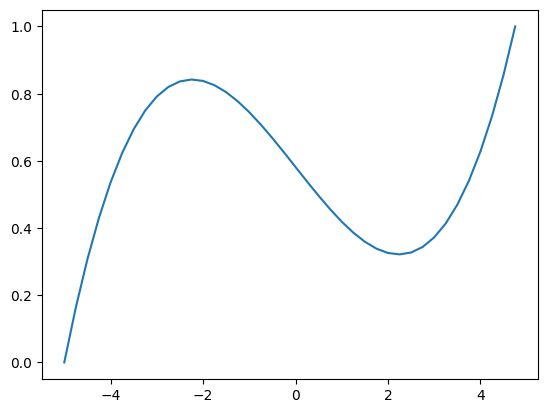

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return (1/5)*x**3 - 3*x + 4

xs = np.arange(-5, 5, 0.25)
ys = f(xs)
# min max scaling to ys to be in [0, 1]
ys = (ys - ys.min())/(ys.max() - ys.min())

plt.plot(xs, ys)
xs = mg.from_list([[x] for x in xs])
ys = mg.from_numpy(ys)

In [13]:
from mikegrad.losses import MSELoss
from mikegrad.optim import SGD
from mikegrad.utils import train

mlp = MLP(1, [8, 1], act=mg.nn.Sigmoid())
nepochs=2000
loss_fn = MSELoss()
lr=0.5
optimizer = SGD(mlp.parameters(), lr=lr)
train(mlp, xs, ys, loss_fn, optimizer, nepochs)

Epochs: 100%|██████████| 2000/2000 [00:46<00:00, 42.74it/s, loss=0.019114]


In [14]:
from mikegrad.utils import test

loss, y_preds = test(mlp, xs, ys, loss_fn)

print(f"Loss: {loss:.6f}")

Testing: 100%|██████████| 40/40 [00:00<00:00, 1276.84it/s, loss=0.144830]

Loss: 0.019458


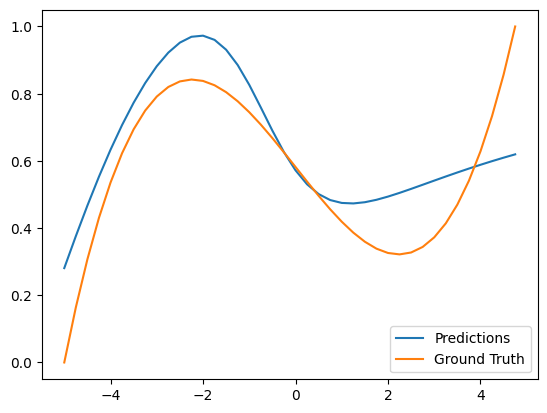

In [15]:
plt.plot(mg.to_list(xs), mg.to_list(y_preds))
plt.plot(mg.to_list(xs), mg.to_list(ys))
plt.legend(['Predictions', 'Ground Truth'])